In [2]:
#Inspired by https://towardsdatascience.com/hands-on-big-data-streaming-apache-spark-at-scale-fd89c15fa6b0
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [3]:
sc = SparkContext()
# we initiate the StreamingContext with 10 second batch interval. #next we initiate our sqlcontext
ssc = StreamingContext(sc, 10)
sqlContext = SQLContext(sc)

In [4]:
# initiate streaming text from a TCP (socket) source:
socket_stream = ssc.socketTextStream("192.168.1.51", 4042)
# lines of tweets with socket_stream window of size 60, or 60 #seconds windows of time
lines = socket_stream.window(60)

In [5]:
# just a tuple to assign names
from collections import namedtuple
fields = ("hash", "count_hash")
Tweet = namedtuple('Tweet', fields)
(lines.flatMap(lambda sentence: sentence.split( " " )) 
  .filter(lambda word: word.lower().startswith("#")) 
  .map(lambda word: (word, 1)) 
  .reduceByKey( lambda a, b: a + b ) 
  .map(lambda rec: Tweet(rec[0], rec[1]))
  .foreachRDD(lambda rdd: rdd.toDF().sort(desc("count_hash"))
  .limit(10).registerTempTable("tweets").createOrReplaceTempView("tweets")))

In [6]:
# start streaming and wait couple of minutes to get enought tweets
ssc.start()

In [7]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
%matplotlib inline

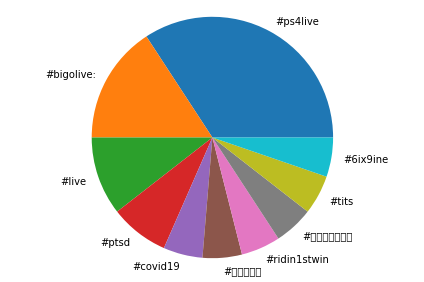

5


In [11]:

count = 0
while count < 5:
    time.sleep(5)
    top_10_tags = sqlContext.sql('SELECT hash, count_hash from tweets')
    top_10_df = top_10_tags.toPandas()
    display.clear_output(wait=True)
    plt.pie(top_10_df['count_hash'],labels=top_10_df['hash'])
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    count = count + 1
    print(count)

In [ ]:
# I used filter ["live"] for this task

C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12515 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12511 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Adam\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12463 missing from current f

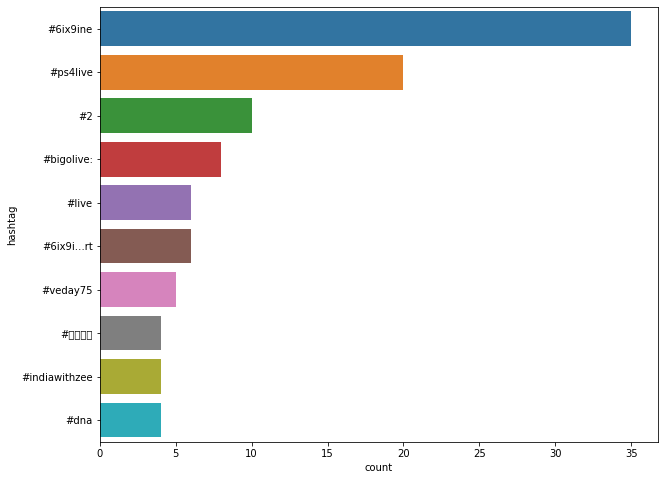

5


In [13]:
count = 0
while count < 5:
    time.sleep(5)
    top_10_tags = sqlContext.sql('SELECT hashtag, count from tweets')
    top_10_df = top_10_tags.toPandas()
    display.clear_output(wait=True)
    plt.figure(figsize = (10, 8))
    sns.barplot(x="count", y="hashtag", data=top_10_df)
    plt.show()
    count = count + 1
    print(count)

In [ ]:

# 6ix9ine was was rapper playing live on that day